In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [103]:
# Load and clean dataset
df = pd.read_csv('./Churn_Modelling.csv')

In [104]:
# Clean column names
df.columns = df.columns.str.strip().str.lower()

In [105]:
# Remove unnecessary columns
df.drop(['rownumber', 'customerid', 'surname', 'geography', 'gender'], axis=1, inplace=True)

In [106]:
# Check for missing values
print(df.isna().sum())

# Check for duplicates (excluding customerid, since it has been dropped)
print(df[df.duplicated(keep=False)])


creditscore        0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64
Empty DataFrame
Columns: [creditscore, age, tenure, balance, numofproducts, hascrcard, isactivemember, estimatedsalary, exited]
Index: []


In [107]:
# Downsample the majority class to balance the dataset
majority_class = df[df['exited'] == 0]
minority_class = df[df['exited'] == 1]
downsampled_majority = resample(majority_class, n_samples=2037, replace=False, random_state=42)
balanced_df = pd.concat([downsampled_majority, minority_class])

In [108]:
# Separate features and target
X = balanced_df.drop('exited', axis=1)
y = balanced_df['exited']

In [109]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
# Logistic Regression with L1 penalty
log_reg_l1 = LogisticRegressionCV(max_iter=500, solver='liblinear', penalty='l1', cv=3, Cs=10)
log_reg_l1.fit(X_train, y_train)

LogisticRegressionCV(cv=3, max_iter=500, penalty='l1', solver='liblinear')

In [111]:
# Scores and Predictions for Logistic Regression L1
print(f"Log Reg L1 - Training Score: {log_reg_l1.score(X_train, y_train)}")
print(f"Log Reg L1 - Test Score: {log_reg_l1.score(X_test, y_test)}")
y_pred_lr = log_reg_l1.predict(X_test)

Log Reg L1 - Training Score: 0.6815152578042792
Log Reg L1 - Test Score: 0.6966475878986099


In [112]:
# Evaluation metrics
print(f"Precision (L1): {precision_score(y_test, y_pred_lr)}")
print(f"Recall (L1): {recall_score(y_test, y_pred_lr)}")
print(f"Accuracy (L1): {accuracy_score(y_test, y_pred_lr)}")
print(f"F1 Score (L1): {f1_score(y_test, y_pred_lr)}")

Precision (L1): 0.672077922077922
Recall (L1): 0.7101200686106347
Accuracy (L1): 0.6966475878986099
F1 Score (L1): 0.6905754795663053


<Figure size 900x700 with 0 Axes>

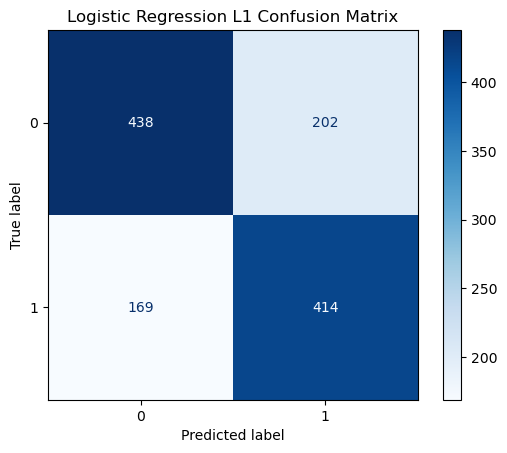

In [113]:
# Confusion Matrix for Logistic Regression L1
cmd_lr = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr, labels=log_reg_l1.classes_), display_labels=log_reg_l1.classes_)
plt.figure(figsize=(9, 7))  # Adjusted figure size
cmd_lr.plot(cmap='Blues')
plt.title("Logistic Regression L1 Confusion Matrix")
plt.show()

In [114]:
# Logistic Regression with L2 penalty
log_reg_l2 = LogisticRegressionCV(max_iter=500, solver='liblinear', penalty='l2', cv=4, Cs=10)
log_reg_l2.fit(X_train, y_train)

LogisticRegressionCV(cv=4, max_iter=500, solver='liblinear')

In [115]:
# Scores and Predictions for Logistic Regression L2
print(f"Log Reg L2 - Training Score: {log_reg_l2.score(X_train, y_train)}")
print(f"Log Reg L2 - Test Score: {log_reg_l2.score(X_test, y_test)}")
y_pred_lr2 = log_reg_l2.predict(X_test)

Log Reg L2 - Training Score: 0.6639775517362329
Log Reg L2 - Test Score: 0.6590351594439902


In [116]:
# Evaluation metrics
print(f"Precision (L2): {precision_score(y_test, y_pred_lr2)}")
print(f"Recall (L2): {recall_score(y_test, y_pred_lr2)}")
print(f"Accuracy (L2): {accuracy_score(y_test, y_pred_lr2)}")
print(f"F1 Score (L2): {f1_score(y_test, y_pred_lr2)}")



Precision (L2): 0.628482972136223
Recall (L2): 0.6963979416809606
Accuracy (L2): 0.6590351594439902
F1 Score (L2): 0.660699755899105


<Figure size 900x700 with 0 Axes>

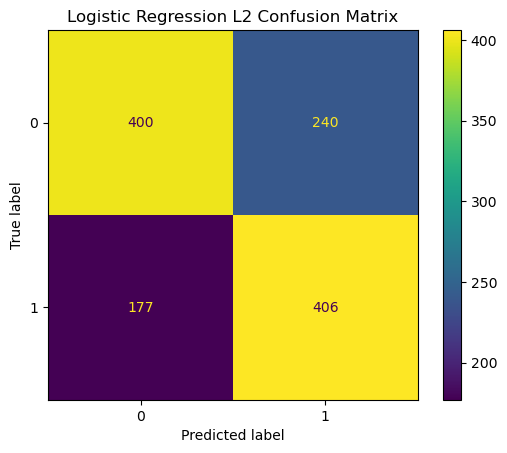

In [117]:
# Confusion Matrix for Logistic Regression L2
cmd_lr2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_lr2, labels=log_reg_l2.classes_), display_labels=log_reg_l2.classes_)
plt.figure(figsize=(9, 7))
cmd_lr2.plot(cmap='viridis')
plt.title("Logistic Regression L2 Confusion Matrix")
plt.show()



In [118]:
# K-Nearest Neighbors with original data
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)



KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [119]:
# Scores and Predictions for KNN
print(f"KNN - Training Score: {knn.score(X_train, y_train)}")
print(f"KNN - Test Score: {knn.score(X_test, y_test)}")
y_pred_knn = knn.predict(X_test)



KNN - Training Score: 0.7642932304454577
KNN - Test Score: 0.5257563368765331


In [120]:
# Evaluation metrics
print(f"Precision (KNN): {precision_score(y_test, y_pred_knn)}")
print(f"Recall (KNN): {recall_score(y_test, y_pred_knn)}")
print(f"Accuracy (KNN): {accuracy_score(y_test, y_pred_knn)}")
print(f"F1 Score (KNN): {f1_score(y_test, y_pred_knn)}")



Precision (KNN): 0.5025906735751295
Recall (KNN): 0.49914236706689535
Accuracy (KNN): 0.5257563368765331
F1 Score (KNN): 0.5008605851979346


<Figure size 900x700 with 0 Axes>

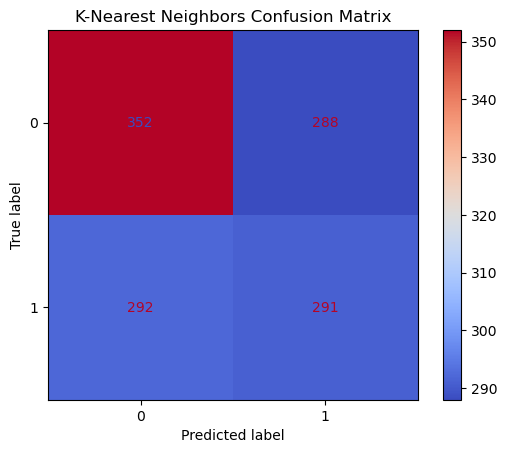

In [121]:
# Confusion Matrix for KNN
cmd_knn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn, labels=knn.classes_), display_labels=knn.classes_)
plt.figure(figsize=(9, 7))  # Adjusted size
cmd_knn.plot(cmap='coolwarm')
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()



In [122]:
# Standard Scaling for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [123]:
# Fit KNN with scaled data
knn.fit(X_train_scaled, y_train)



KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [124]:
# Scores and Predictions for KNN (scaled)
print(f"KNN Scaled - Training Score: {knn.score(X_train_scaled, y_train)}")
print(f"KNN Scaled - Test Score: {knn.score(X_test_scaled, y_test)}")
y_pred_knn_scaled = knn.predict(X_test_scaled)



KNN Scaled - Training Score: 0.8439144159943879
KNN Scaled - Test Score: 0.7195421095666394


In [125]:
# Evaluation metrics
print(f"Precision (KNN Scaled): {precision_score(y_test, y_pred_knn_scaled)}")
print(f"Recall (KNN Scaled): {recall_score(y_test, y_pred_knn_scaled)}")
print(f"Accuracy (KNN Scaled): {accuracy_score(y_test, y_pred_knn_scaled)}")
print(f"F1 Score (KNN Scaled): {f1_score(y_test, y_pred_knn_scaled)}")



Precision (KNN Scaled): 0.7061855670103093
Recall (KNN Scaled): 0.7049742710120068
Accuracy (KNN Scaled): 0.7195421095666394
F1 Score (KNN Scaled): 0.7055793991416309


<Figure size 900x700 with 0 Axes>

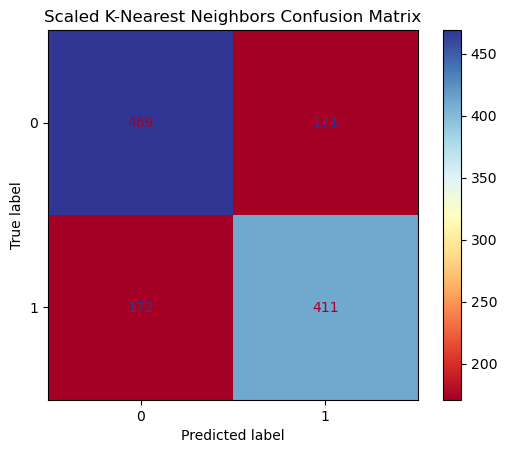

In [126]:
# Confusion Matrix for scaled KNN
cmd_knn_scaled = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_knn_scaled, labels=knn.classes_), display_labels=knn.classes_)
plt.figure(figsize=(9, 7))
cmd_knn_scaled.plot(cmap='RdYlBu')
plt.title("Scaled K-Nearest Neighbors Confusion Matrix")
plt.show()



In [127]:
# Support Vector Classifier (SVC)
svc = SVC(kernel='rbf', gamma=0.1, C=1)
svc.fit(X_train, y_train)



SVC(C=1, gamma=0.1)

In [128]:
# Scores and Predictions for SVC
print(f"SVC - Training Score: {svc.score(X_train, y_train)}")
print(f"SVC - Test Score: {svc.score(X_test, y_test)}")
y_pred_svc = svc.predict(X_test)



SVC - Training Score: 1.0
SVC - Test Score: 0.4766966475878986


In [129]:
# Evaluation metrics
print(f"Precision (SVC): {precision_score(y_test, y_pred_svc)}")
print(f"Recall (SVC): {recall_score(y_test, y_pred_svc)}")
print(f"Accuracy (SVC): {accuracy_score(y_test, y_pred_svc)}")
print(f"F1 Score (SVC): {f1_score(y_test, y_pred_svc)}")



Precision (SVC): 0.4766966475878986
Recall (SVC): 1.0
Accuracy (SVC): 0.4766966475878986
F1 Score (SVC): 0.64562569213732


<Figure size 900x700 with 0 Axes>

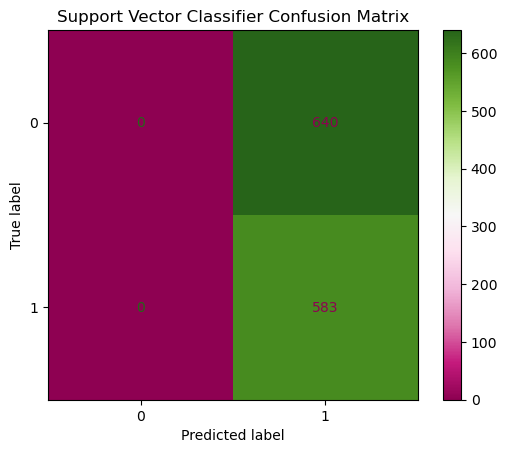

In [130]:
# Confusion Matrix for SVC
cmd_svc = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_svc, labels=svc.classes_), display_labels=svc.classes_)
plt.figure(figsize=(9, 7))
cmd_svc.plot(cmap='PiYG')
plt.title("Support Vector Classifier Confusion Matrix")
plt.show()
